In [76]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [239]:
data=pd.read_csv("Weather Training Data.csv")
#file not found
# the file you have != the filename you have written

In [240]:
data.head(10)

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0
5,Row5,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0
6,Row6,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,No,1
7,Row7,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,1
8,Row8,Albury,12.6,21.0,3.6,NaN,NaN,SW,44.0,W,...,65.0,43.0,1001.2,1001.8,NaN,7.0,15.8,19.8,Yes,0
9,Row9,Albury,9.8,27.7,NaN,NaN,NaN,WNW,50.0,NaN,...,50.0,28.0,1013.4,1010.3,0.0,NaN,17.3,26.2,NaN,0


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

In [116]:
data.shape

(99516, 23)

In [117]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,99073.000000,99286.000000,98537.000000,56985.00000,52199.000000,93036.000000,98581.000000,97681.000000,98283.000000,97010.000000,89768.000000,89780.000000,61944.000000,59514.000000,98902.000000,97612.000000,99516.000000
mean,12.176266,23.218513,2.353024,5.46132,7.615090,39.976966,14.004849,18.650464,68.866376,51.433296,1017.684638,1015.286204,4.447985,4.519122,16.970041,21.681340,0.224677
std,6.390882,7.115072,8.487866,4.16249,3.783008,13.581524,8.902323,8.801827,19.074951,20.777616,7.110166,7.045189,2.886580,2.716618,6.488961,6.931681,0.417372
min,-8.500000,-4.100000,0.000000,0.00000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.000000,-5.100000,0.000000
25%,7.600000,17.900000,0.000000,2.60000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.80000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.40000,10.600000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.400000,0.000000
max,33.900000,48.100000,371.000000,86.20000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000


In [118]:
data.isnull().sum()

row ID               0
Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64

In [119]:
data.isna().sum()

row ID               0
Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64

In [120]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5725 entries, 2 to 10357
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         5725 non-null   object 
 1   Location       5725 non-null   object 
 2   MinTemp        5725 non-null   float64
 3   Rainfall       5684 non-null   float64
 4   Evaporation    4221 non-null   float64
 5   Sunshine       2607 non-null   float64
 6   WindGustDir    5725 non-null   object 
 7   WindGustSpeed  5725 non-null   float64
 8   WindDir9am     5487 non-null   object 
 9   WindDir3pm     5697 non-null   object 
 10  WindSpeed9am   5725 non-null   float64
 11  WindSpeed3pm   5725 non-null   float64
 12  Humidity9am    5692 non-null   float64
 13  Humidity3pm    5690 non-null   float64
 14  Pressure9am    5713 non-null   float64
 15  Cloud9am       5153 non-null   float64
 16  Cloud3pm       5725 non-null   float64
 17  Temp9am        5724 non-null   float64
 18  Temp3pm

In [121]:
#col_list=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
#'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm']

In [122]:
col_list = list(data.columns)


In [123]:
data['WindGustDir'].mode()[0]

'W'

In [241]:
for col in col_list:
    if data[col].dtypes=='object':
        #print('ob')
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        #print('num')
        data[col] = data[col].fillna(data[col].median())

In [194]:
data.head(10)

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,4.8,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,4.8,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,5.0,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,4.8,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,4.8,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,5.0,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,4.8,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,5.0,16.3,25.5,No,0
5,Row5,Albury,13.1,30.1,1.4,4.8,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,5.0,20.1,28.2,Yes,0
6,Row6,Albury,13.4,30.4,0.0,4.8,NaN,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,NaN,5.0,20.4,28.8,No,1
7,Row7,Albury,15.9,21.7,2.2,4.8,NaN,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,1
8,Row8,Albury,12.6,21.0,3.6,4.8,NaN,SW,44.0,W,...,65.0,43.0,1001.2,1001.8,NaN,7.0,15.8,19.8,Yes,0
9,Row9,Albury,9.8,27.7,0.0,4.8,NaN,WNW,50.0,N,...,50.0,28.0,1013.4,1010.3,0.0,5.0,17.3,26.2,No,0


In [125]:
data.isna().sum()

row ID           0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

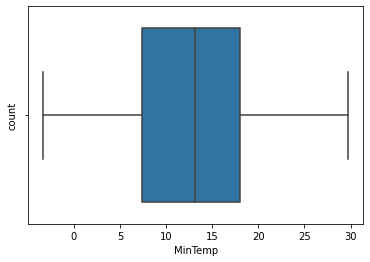

KeyError: ignored

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
for col_name in col_list:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        sns.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [143]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MinTemp           9.2
MaxTemp          10.3
Rainfall          0.6
Evaporation       1.4
Sunshine          0.5
WindGustSpeed    15.0
WindSpeed9am     12.0
WindSpeed3pm     11.0
Humidity9am      26.0
Humidity3pm      28.0
Pressure9am       8.2
Pressure3pm       8.5
Cloud9am          3.0
Cloud3pm          2.0
Temp9am           9.2
Temp3pm           9.6
RainTomorrow      0.0
dtype: float64


In [128]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [242]:
Q1 = data['MinTemp'].quantile(0.25)
Q3 = data['MinTemp'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['MinTemp'] >= Q1 - 1.5*IQR) & (data['MinTemp'] <= Q3 + 1.5*IQR)]

Q1 = data['WindGustSpeed'].quantile(0.25)
Q3 = data['WindGustSpeed'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['WindGustSpeed'] >= Q1 - 1.5*IQR) & (data['WindGustSpeed'] <= Q3 + 1.5*IQR)]

Q1 = data['WindSpeed9am'].quantile(0.25)
Q3 = data['WindSpeed9am'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['WindSpeed9am'] >= Q1 - 1.5*IQR) & (data['WindSpeed9am'] <= Q3 + 1.5*IQR)]

Q1 = data['WindSpeed3pm'].quantile(0.25)
Q3 = data['WindSpeed3pm'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['WindSpeed3pm'] >= Q1 - 1.5*IQR) & (data['WindSpeed3pm'] <= Q3 + 1.5*IQR)]

Q1 = data['Cloud3pm'].quantile(0.25)
Q3 = data['Cloud3pm'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Cloud3pm'] >= Q1 - 1.5*IQR) & (data['Cloud3pm'] <= Q3 + 1.5*IQR)]



In [162]:
data.head(10)

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,4.8,8.4,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,5.0,5.0,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,4.8,8.4,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,5.0,5.0,16.3,25.5,No,0
5,Row5,Albury,13.1,30.1,1.4,4.8,8.4,W,28.0,S,...,58.0,27.0,1007.0,1005.7,5.0,5.0,20.1,28.2,Yes,0
6,Row6,Albury,13.4,30.4,0.0,4.8,8.4,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,5.0,5.0,20.4,28.8,No,1
7,Row7,Albury,15.9,21.7,2.2,4.8,8.4,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,1
8,Row8,Albury,12.6,21.0,3.6,4.8,8.4,SW,44.0,W,...,65.0,43.0,1001.2,1001.8,5.0,7.0,15.8,19.8,Yes,0
9,Row9,Albury,9.8,27.7,0.0,4.8,8.4,WNW,50.0,N,...,50.0,28.0,1013.4,1010.3,0.0,5.0,17.3,26.2,No,0


In [130]:
data.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
MinTemp,1.000000,0.712084,0.023668,0.130776,-0.000679,0.248318,0.223584,0.254009,-0.228234,0.059677,-0.400647,-0.392899,0.009248,NaN,0.885870,0.666680,NaN
MaxTemp,0.712084,1.000000,-0.136967,0.135686,0.000335,0.198208,0.066888,0.125920,-0.385254,-0.457094,-0.375590,-0.439287,-0.050085,NaN,0.846178,0.963199,NaN
Rainfall,0.023668,-0.136967,1.000000,-0.037630,-0.018538,0.007664,0.017498,0.007524,0.169194,0.172071,-0.022272,0.022953,0.041116,NaN,-0.061691,-0.134812,NaN
Evaporation,0.130776,0.135686,-0.037630,1.000000,-0.038978,0.048902,0.038913,0.036294,-0.086803,-0.015976,-0.117273,-0.120229,0.023825,NaN,0.145813,0.109857,NaN
Sunshine,-0.000679,0.000335,-0.018538,-0.038978,1.000000,0.006068,0.018097,-0.004413,-0.021301,-0.017963,0.020673,0.016988,-0.066249,NaN,0.003741,0.003846,NaN
WindGustSpeed,0.248318,0.198208,0.007664,0.048902,0.006068,1.000000,0.531117,0.668417,-0.356548,-0.154914,-0.344995,-0.318779,-0.037185,NaN,0.276255,0.172361,NaN
WindSpeed9am,0.223584,0.066888,0.017498,0.038913,0.018097,0.531117,1.000000,0.427396,-0.375674,-0.055999,-0.155361,-0.114395,-0.018972,NaN,0.218054,0.053621,NaN
WindSpeed3pm,0.254009,0.125920,0.007524,0.036294,-0.004413,0.668417,0.427396,1.000000,-0.200080,0.057392,-0.201615,-0.181666,-0.016890,NaN,0.271842,0.098630,NaN
Humidity9am,-0.228234,-0.385254,0.169194,-0.086803,-0.021301,-0.356548,-0.375674,-0.200080,1.000000,0.534547,0.228482,0.238330,0.084751,NaN,-0.451655,-0.378981,NaN
Humidity3pm,0.059677,-0.457094,0.172071,-0.015976,-0.017963,-0.154914,-0.055999,0.057392,0.534547,1.000000,0.113222,0.164632,0.043865,NaN,-0.145670,-0.518236,NaN


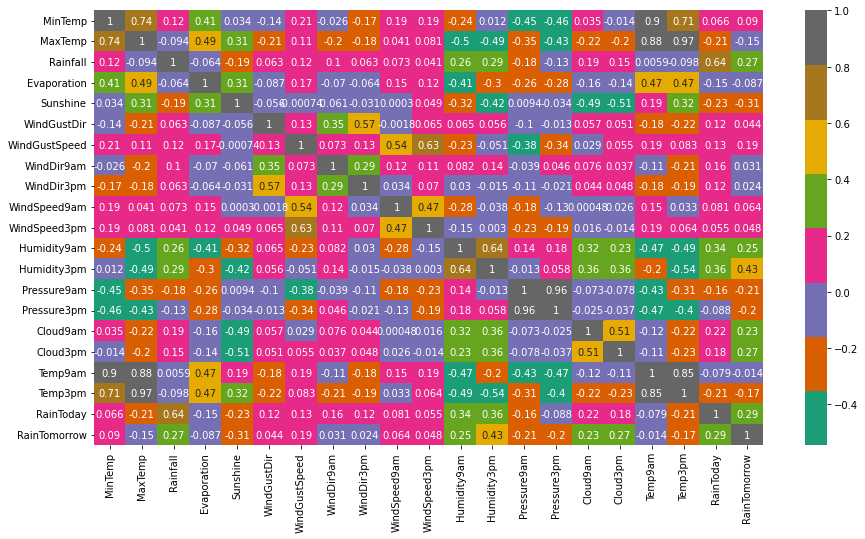

In [156]:
fig = plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="Dark2")
plt.show()

In [251]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
#col_list1=['WindGustDir','WindDir9am','WindDir3pm','RainToday']
for i in col_list:
    data[i]=labelencoder.fit_transform(data[i])

In [244]:
data.head(10)

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,6,48,NaN,W,44.0,13,...,71.0,22.0,1007.7,1007.1,8,4,16.9,21.8,0,0
1,Row1,Albury,7.4,25.1,0,48,NaN,WNW,44.0,6,...,44.0,25.0,1010.6,1007.8,5,4,17.2,24.3,0,0
2,Row2,Albury,17.5,32.3,10,48,NaN,W,41.0,1,...,82.0,33.0,1010.8,1006.0,7,7,17.8,29.7,0,0
3,Row3,Albury,14.6,29.7,2,48,NaN,WNW,56.0,13,...,55.0,23.0,1009.2,1005.4,5,4,20.6,28.9,0,0
4,Row4,Albury,7.7,26.7,0,48,NaN,W,35.0,10,...,48.0,19.0,1013.4,1010.1,5,4,16.3,25.5,0,0
5,Row5,Albury,13.1,30.1,14,48,NaN,W,28.0,8,...,58.0,27.0,1007.0,1005.7,5,4,20.1,28.2,1,0
6,Row6,Albury,13.4,30.4,0,48,NaN,N,30.0,10,...,48.0,22.0,1011.8,1008.7,5,4,20.4,28.8,0,1
7,Row7,Albury,15.9,21.7,22,48,NaN,NNE,31.0,4,...,89.0,91.0,1010.5,1004.2,8,7,15.9,17.0,1,1
8,Row8,Albury,12.6,21.0,36,48,NaN,SW,44.0,13,...,65.0,43.0,1001.2,1001.8,5,6,15.8,19.8,1,0
9,Row9,Albury,9.8,27.7,0,48,NaN,WNW,50.0,3,...,50.0,28.0,1013.4,1010.3,0,4,17.3,26.2,0,0


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22152 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   row ID         22152 non-null  int64
 1   Location       22152 non-null  int64
 2   MinTemp        22152 non-null  int64
 3   MaxTemp        22152 non-null  int64
 4   Rainfall       22152 non-null  int64
 5   Evaporation    22152 non-null  int64
 6   Sunshine       22152 non-null  int64
 7   WindGustDir    22152 non-null  int64
 8   WindGustSpeed  22152 non-null  int64
 9   WindDir9am     22152 non-null  int64
 10  WindDir3pm     22152 non-null  int64
 11  WindSpeed9am   22152 non-null  int64
 12  WindSpeed3pm   22152 non-null  int64
 13  Humidity9am    22152 non-null  int64
 14  Humidity3pm    22152 non-null  int64
 15  Pressure9am    22152 non-null  int64
 16  Pressure3pm    22152 non-null  int64
 17  Cloud9am       22152 non-null  int64
 18  Cloud3pm       22152 non-null  int64
 19  Temp

In [245]:
data=data.drop(columns=["row ID","Location"])
#df["RainTomorrow"].unique()

In [136]:
col1=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine','WindGustDir', 'WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Temp9am','Temp3pm']

In [252]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'RainTomorrow') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)
print(vif_data.max())

          feature         VIF
0         MinTemp   57.787731
1         MaxTemp   87.854384
2        Rainfall    1.991873
3     Evaporation    6.372108
4        Sunshine    8.695761
5   WindGustSpeed   19.596390
6      WindDir9am    4.034667
7      WindDir3pm    4.360622
8    WindSpeed9am    6.439548
9    WindSpeed3pm   11.886496
10    Humidity9am   32.500779
11    Humidity3pm   22.539098
12    Pressure3pm   12.639705
13       Cloud9am    8.811407
14       Cloud3pm    7.254100
15        Temp9am  102.362395
16      RainToday    2.511091
feature    WindSpeed9am
VIF          102.362395
dtype: object


In [253]:
data=data.drop(['Pressure9am'], axis = 1)

KeyError: ignored

In [254]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'RainTomorrow') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)
print(vif_data.max())

          feature         VIF
0         MinTemp   57.787731
1         MaxTemp   87.854384
2        Rainfall    1.991873
3     Evaporation    6.372108
4        Sunshine    8.695761
5   WindGustSpeed   19.596390
6      WindDir9am    4.034667
7      WindDir3pm    4.360622
8    WindSpeed9am    6.439548
9    WindSpeed3pm   11.886496
10    Humidity9am   32.500779
11    Humidity3pm   22.539098
12    Pressure3pm   12.639705
13       Cloud9am    8.811407
14       Cloud3pm    7.254100
15        Temp9am  102.362395
16      RainToday    2.511091
feature    WindSpeed9am
VIF          102.362395
dtype: object


In [255]:
data=data.drop(['MaxTemp'], axis = 1)

In [256]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'RainTomorrow') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)
print(vif_data.max())

          feature        VIF
0         MinTemp  55.125089
1        Rainfall   1.991057
2     Evaporation   6.271044
3        Sunshine   8.273278
4   WindGustSpeed  19.194062
5      WindDir9am   3.991649
6      WindDir3pm   4.348808
7    WindSpeed9am   6.380994
8    WindSpeed3pm  11.835665
9     Humidity9am  25.966796
10    Humidity3pm  15.125957
11    Pressure3pm  12.493426
12       Cloud9am   8.792345
13       Cloud3pm   7.174041
14        Temp9am  61.036357
15      RainToday   2.464424
feature    WindSpeed9am
VIF           61.036357
dtype: object


In [257]:
data=data.drop(['Temp9am'], axis = 1)

In [258]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'RainTomorrow') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)
print(vif_data.max())

          feature        VIF
0         MinTemp  10.963797
1        Rainfall   1.991034
2     Evaporation   6.191957
3        Sunshine   7.815345
4   WindGustSpeed  19.030618
5      WindDir9am   3.957041
6      WindDir3pm   4.328134
7    WindSpeed9am   6.313610
8    WindSpeed3pm  11.749975
9     Humidity9am  25.675687
10    Humidity3pm  15.071093
11    Pressure3pm  11.897257
12       Cloud9am   8.718016
13       Cloud3pm   7.121916
14      RainToday   2.437668
feature    WindSpeed9am
VIF           25.675687
dtype: object


In [259]:
data=data.drop(['Temp3pm'], axis = 1)

KeyError: ignored

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'RainTomorrow') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)
print(vif_data.max())

In [260]:
data=data.drop(['Humidity9am'], axis = 1)

In [261]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'RainTomorrow') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)
print(vif_data.max())

          feature        VIF
0         MinTemp  10.923339
1        Rainfall   1.988830
2     Evaporation   6.173044
3        Sunshine   7.569796
4   WindGustSpeed  18.995295
5      WindDir9am   3.956656
6      WindDir3pm   4.252744
7    WindSpeed9am   6.016396
8    WindSpeed3pm  11.681264
9     Humidity3pm   9.632690
10    Pressure3pm   9.996949
11       Cloud9am   8.369045
12       Cloud3pm   7.121272
13      RainToday   2.414438
feature    WindSpeed9am
VIF           18.995295
dtype: object


In [262]:
data=data.drop(['WindGustSpeed'], axis = 1)

In [263]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'RainTomorrow') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)
print(vif_data.max())

         feature        VIF
0        MinTemp  10.814877
1       Rainfall   1.984980
2    Evaporation   6.091943
3       Sunshine   7.470059
4     WindDir9am   3.950736
5     WindDir3pm   4.123113
6   WindSpeed9am   5.163395
7   WindSpeed3pm   8.053988
8    Humidity3pm   9.628832
9    Pressure3pm   9.996167
10      Cloud9am   8.355312
11      Cloud3pm   7.010082
12     RainToday   2.406215
feature    WindSpeed9am
VIF           10.814877
dtype: object


In [264]:
data=data.drop(['MinTemp'], axis = 1)

In [265]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'RainTomorrow') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)
print(vif_data.max())

         feature       VIF
0       Rainfall  1.982157
1    Evaporation  4.453275
2       Sunshine  7.361361
3     WindDir9am  3.943519
4     WindDir3pm  4.101093
5   WindSpeed9am  5.081378
6   WindSpeed3pm  7.779840
7    Humidity3pm  8.996092
8    Pressure3pm  9.911573
9       Cloud9am  8.168493
10      Cloud3pm  7.005779
11     RainToday  2.406206
feature    WindSpeed9am
VIF            9.911573
dtype: object


In [266]:
data=data.drop(['Pressure3pm'], axis = 1)

In [267]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'RainTomorrow') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)
print(vif_data.max())

         feature       VIF
0       Rainfall  1.967582
1    Evaporation  4.453250
2       Sunshine  5.674610
3     WindDir9am  3.901818
4     WindDir3pm  4.037618
5   WindSpeed9am  5.057977
6   WindSpeed3pm  7.763575
7    Humidity3pm  8.230794
8       Cloud9am  7.990035
9       Cloud3pm  6.949945
10     RainToday  2.396452
feature    WindSpeed9am
VIF            8.230794
dtype: object


In [268]:
data=data.drop(['Humidity3pm'], axis = 1)

In [269]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'RainTomorrow') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)
print(vif_data.max())

        feature       VIF
0      Rainfall  1.959630
1   Evaporation  4.441107
2      Sunshine  5.401493
3    WindDir9am  3.790216
4    WindDir3pm  4.037239
5  WindSpeed9am  5.057903
6  WindSpeed3pm  7.584881
7      Cloud9am  7.408466
8      Cloud3pm  6.324019
9     RainToday  2.333449
feature    WindSpeed9am
VIF            7.584881
dtype: object


In [270]:
data=data.drop(['WindSpeed3pm'], axis = 1)

In [271]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'RainTomorrow') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)
print(vif_data.max())

        feature       VIF
0      Rainfall  1.959366
1   Evaporation  4.332386
2      Sunshine  5.233411
3    WindDir9am  3.753658
4    WindDir3pm  3.977144
5  WindSpeed9am  3.775374
6      Cloud9am  7.266568
7      Cloud3pm  6.311379
8     RainToday  2.331841
feature    WindSpeed9am
VIF            7.266568
dtype: object


In [272]:
data=data.drop(['Sunshine'], axis = 1)

In [273]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'RainTomorrow') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)
print(vif_data.max())

        feature       VIF
0      Rainfall  1.951027
1   Evaporation  3.441506
2    WindDir9am  3.659979
3    WindDir3pm  3.828599
4  WindSpeed9am  3.743156
5      Cloud9am  7.097857
6      Cloud3pm  6.301649
7     RainToday  2.329401
feature    WindSpeed9am
VIF            7.097857
dtype: object


In [274]:
data=data.drop(['WindGustDir'], axis = 1)

In [275]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'RainTomorrow') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)
print(vif_data.max())

        feature       VIF
0      Rainfall  1.951027
1   Evaporation  3.441506
2    WindDir9am  3.659979
3    WindDir3pm  3.828599
4  WindSpeed9am  3.743156
5      Cloud9am  7.097857
6      Cloud3pm  6.301649
7     RainToday  2.329401
feature    WindSpeed9am
VIF            7.097857
dtype: object


In [276]:
a=list(vif_data.feature)
a

['Rainfall',
 'Evaporation',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'Cloud9am',
 'Cloud3pm',
 'RainToday']

In [237]:
#data=data[a]
#data

,Rainfall,Evaporation,WindDir9am,WindDir3pm,WindSpeed9am,Cloud9am,Cloud3pm,RainToday
0,6,48,13,14,11,8,4,0
1,0,48,6,15,2,10,4,0
2,10,48,1,7,4,7,7,0
3,2,48,13,13,10,10,4,0
4,0,48,10,13,3,10,4,0
...,...,...,...,...,...,...,...,...
99511,0,48,9,0,10,10,6,0
99512,0,48,2,0,8,10,4,0
99513,0,48,9,1,7,10,4,0
99514,0,48,9,3,7,10,4,0


In [278]:
a

['Rainfall',
 'Evaporation',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'Cloud9am',
 'Cloud3pm',
 'RainToday']

In [281]:
data.head()

,Rainfall,Evaporation,WindDir9am,WindDir3pm,WindSpeed9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,6,48,13,14,11,8,4,0,0
1,0,48,6,15,2,5,4,0,0
2,10,48,1,7,4,7,7,0,0
3,2,48,13,13,10,5,4,0,0
4,0,48,10,13,3,5,4,0,0


In [279]:
from sklearn.model_selection import train_test_split
#x=data.drop('MinTemp',axis=1)
x=data[a]
y=data['RainTomorrow']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [282]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()
log_reg_model.fit(x_train, y_train)

LogisticRegression()

In [283]:
y_test_pred=log_reg_model.predict(x_test)

In [284]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))

0.8016384870141189


In [285]:
from sklearn.metrics import *

In [286]:
confusion_matrix(y_test_pred,y_test)

array([[12883,  2834],
       [  580,   914]])

In [287]:
from sklearn.tree import DecisionTreeClassifier

In [288]:
dt=DecisionTreeClassifier()

In [289]:

dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [292]:
dt_y_pred=dt.predict(x_test)

In [293]:
confusion_matrix(dt_y_pred,y_test)

array([[11308,  2302],
       [ 2155,  1446]])

In [294]:
metrics.accuracy_score(y_test, dt_y_pred)

0.7410377084422752